# **Scatter plots and Bar charts**

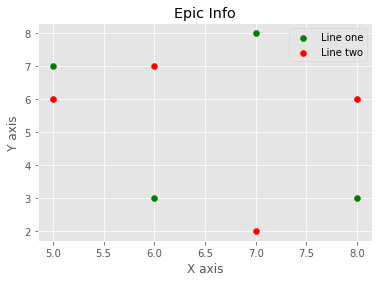

In [6]:
from matplotlib import pyplot as p
from matplotlib import style
style.use('ggplot')
x=[5,6,7,8]
y=[7,3,8,3]
x2=[5,6,7,8]
y2=[6,7,2,6]
p.scatter(x,y,color="g",label="Line one")
p.scatter(x2,y2,color="r",label="Line two")

p.title("Epic Info")
p.xlabel("X axis")
p.ylabel("Y axis")
p.legend()
p.show()

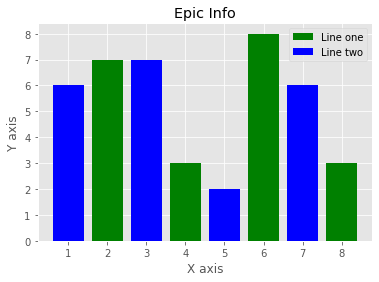

In [7]:
from matplotlib import pyplot as p
from matplotlib import style
style.use('ggplot')
x=[2,4,6,8]
y=[7,3,8,3]
x2=[1,3,5,7]
y2=[6,7,2,6]
p.bar(x,y,color="g",label="Line one",align="center")
p.bar(x2,y2,color="b",label="Line two",align="center")

p.title("Epic Info")
p.xlabel("X axis")
p.ylabel("Y axis")
p.legend()
p.show()

# **Matplotlib plotting from a CSV**

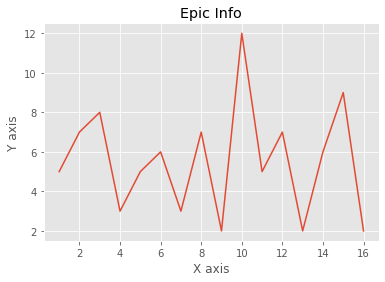

In [8]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

x,y = np.loadtxt('example.csv',
                 unpack=True,
                 delimiter = ',')

plt.plot(x,y)
plt.title('Epic Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')

plt.show()

# **Sockets Intro**

In [9]:
import socket
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
print(s)

<socket.socket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('0.0.0.0', 0)>


In [10]:
import socket
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

server = 'pythonprogramming.net'
port = 80
server_ip = socket.gethostbyname(server)
print(server_ip)

104.237.143.20


In [11]:
import socket
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server = 'pythonprogramming.net'
port = 80
server_ip = socket.gethostbyname(server)
request = "GET / HTTP/1.1\nHost: "+server+"\n\n"
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect(("pythonprogramming.net", 80))
s.send(request.encode())
result = s.recv(1024)

#print(result)
while (len(result) > 0):
    print(result)
    result = s.recv(4096)

b'HTTP/1.1 301 Moved Permanently\r\nDate: Sat, 25 Jul 2020 10:52:54 GMT\r\nServer: Apache/2.4.10 (Ubuntu)\r\nLocation: https://pythonprogramming.net/\r\nContent-Length: 325\r\nContent-Type: text/html; charset=iso-8859-1\r\n\r\n<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>301 Moved Permanently</title>\n</head><body>\n<h1>Moved Permanently</h1>\n<p>The document has moved <a href="https://pythonprogramming.net/">here</a>.</p>\n<hr>\n<address>Apache/2.4.10 (Ubuntu) Server at pythonprogramming.net Port 80</address>\n</body></html>\n'


# **Sockets simple port scanner**

In [12]:
import socket
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server="pythonprogramming.net"

def portscan(port):
  try:
    con = s.connect((server,port))
    return True
  except:
    return False

for x in range(25):
  if portscan(x):
    print('Port',x,'is open!!!')	
  else:
    print("port",x,"is closed")

port 0 is closed
port 1 is closed
port 2 is closed
port 3 is closed
port 4 is closed
port 5 is closed
port 6 is closed
port 7 is closed
port 8 is closed
port 9 is closed
port 10 is closed
port 11 is closed
port 12 is closed
port 13 is closed
port 14 is closed
port 15 is closed
port 16 is closed
port 17 is closed
port 18 is closed
port 19 is closed
port 20 is closed
port 21 is closed
Port 22 is open!!!
port 23 is closed
port 24 is closed


# **Threaded port scanner**

In [13]:
import threading
from queue import Queue
import time
import socket

print_lock = threading.Lock()

target = 'pythonprogramming.net'

def portscan(port):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    try:
        con = s.connect((target,port))
        with print_lock:
            print('port',port,"is open!!!")
        con.close()
    except:
        pass

def threader():
    while True:
        worker = q.get()
        portscan(worker)
        q.task_done()

q = Queue()
for x in range(30):
     t = threading.Thread(target=threader)
     t.daemon = True
     t.start()

start = time.time()
for worker in range(1,100):
    q.put(worker)
q.join()

port 22 is open!!!
port 80 is open!!!
